# Modelos de regresion lineal
## Con datos simulados
**y = a + b x**

X = 100 valores distribuidos segun una N(1.5, 2.5)

Ye = 5 + 1.9 * x + e
e estará distribuido segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
df = pd.DataFrame(
    {
        "x" : x_list,
        "y" : y_act_list,
        "y_pred" : y_pred_list
    }
)

In [8]:
df.head()

,x,y,y_pred
0,-2.499543,1.018655,0.250868
1,3.005583,11.882384,10.710608
2,2.266195,10.017372,9.305771
3,1.390204,9.621167,7.641388
4,0.618834,7.443355,6.175784


In [9]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5,1,'Valor Actual vs Prediccion')

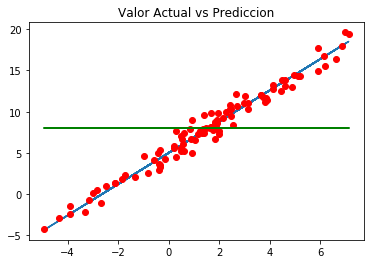

In [10]:
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [11]:
df["SSR"] = (df["y_pred"] - np.mean(y_act))**2
df["SSD"] = (df["y_pred"] - df["y"]) ** 2
df["SST"] = (df["y"] - np.mean(y_act)) ** 2

In [12]:
df.head()

,x,y,y_pred,SSR,SSD,SST
0,-2.499543,1.018655,0.250868,59.490288,0.589496,48.235916
1,3.005583,11.882384,10.710608,7.544608,1.373058,15.354803
2,2.266195,10.017372,9.305771,1.800717,0.506376,4.216900
3,1.390204,9.621167,7.641388,0.103990,3.919523,2.746656
4,0.618834,7.443355,6.175784,3.197227,1.606738,0.270928


In [13]:
SSR = sum(df["SSR"])
SSD = sum(df["SSD"])
SST = sum(df["SST"])

In [14]:
SSR

2567.663591826851

In [15]:
SSD

79.87214463966431

In [16]:
SST

2540.011624333504

In [17]:
SSR+SSD

2647.5357364665156

In [18]:
R2 = SSR / SST

In [19]:
R2

1.0108865515529295

(array([ 4.,  3.,  7., 10., 17., 24.,  9., 13.,  9.,  4.]),
 array([-2.27824868, -1.86803887, -1.45782905, -1.04761924, -0.63740942,
        -0.22719961,  0.18301021,  0.59322002,  1.00342984,  1.41363965,
         1.82384947]),
 <a list of 10 Patch objects>)

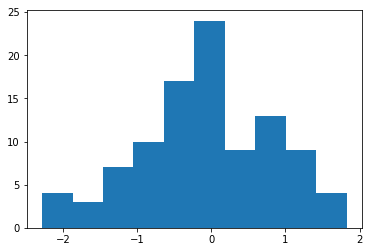

In [20]:
plt.hist(df["y_pred"] - df["y"])

## Obteniendo la recta de regresion

In [21]:
x_mean = df["x"].mean()
y_mean = df["y"].mean()

In [22]:
x_mean, y_mean

(1.5272072661876166, 7.963863112244112)

In [23]:
df["beta_n"] = ( df["x"] - x_mean ) * ( df["y"] - y_mean )
df["beta_d"] = ( df["x"] - x_mean ) ** 2

In [24]:
df.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d
0,-2.499543,1.018655,0.250868,59.490288,0.589496,48.235916,27.966619,16.214717
1,3.005583,11.882384,10.710608,7.544608,1.373058,15.354803,5.793047,2.185596
2,2.266195,10.017372,9.305771,1.800717,0.506376,4.216900,1.517519,0.546103
3,1.390204,9.621167,7.641388,0.103990,3.919523,2.746656,-0.227055,0.018770
4,0.618834,7.443355,6.175784,3.197227,1.606738,0.270928,0.472815,0.825143


In [25]:
beta = df["beta_n"].sum() / df["beta_d"].sum()

In [26]:
alpha = y_mean - beta * x_mean

In [27]:
alpha, beta

(5.122497626507681, 1.8604976211443522)

# y = 5.03787642061344 + 1.8830798268910696 * X 

In [28]:
df["y_model"] = alpha + beta * df["x"]

In [29]:
df.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-2.499543,1.018655,0.250868,59.490288,0.589496,48.235916,27.966619,16.214717,0.472104
1,3.005583,11.882384,10.710608,7.544608,1.373058,15.354803,5.793047,2.185596,10.714378
2,2.266195,10.017372,9.305771,1.800717,0.506376,4.216900,1.517519,0.546103,9.338749
3,1.390204,9.621167,7.641388,0.103990,3.919523,2.746656,-0.227055,0.018770,7.708969
4,0.618834,7.443355,6.175784,3.197227,1.606738,0.270928,0.472815,0.825143,6.273836


In [30]:
SSR_model = sum((df["y_model"] - y_mean)**2)
SSD_model = sum((df["y_model"] - df["y"]) ** 2)
SST_model = sum((df["y"] - y_mean) ** 2)

In [31]:
SSR_model, SSD_model, SST_model

(2461.6356984596096, 78.37592587389548, 2540.0116243335037)

In [32]:
R2_model = SSR_model/SST_model

In [33]:
R2,R2_model

(1.0108865515529295, 0.9691434774852812)

Text(0.5,1,'Valor Actual vs Prediccion')

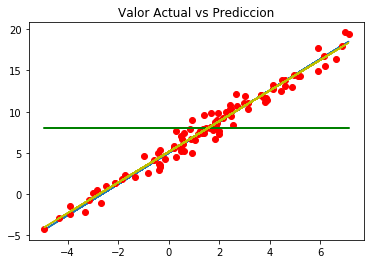

In [34]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]
plt.plot(df["x"],df["y_pred"])
plt.plot(df["x"],df["y"],"ro")
plt.plot(df["x"],y_mean, "g")
plt.plot(df["x"],df["y_model"],"y")
plt.title("Valor Actual vs Prediccion")

# Error estandar residual (RSE)

In [37]:
RSE = np.sqrt( SSD / (len(df) -2) )

In [38]:
RSE

0.9027856246519477

In [39]:
df["y"].mean()

7.963863112244112

In [40]:
RSE / df["y"].mean()

0.1133602639733915